# Import data

In [1]:
'''
Created on June 11, 2018

@author Alex Yu
@version July 1, 2018
'''
%matplotlib inline
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns; sns.set()

pd.options.mode.chained_assignment = None  # default='warn'

exp_gen_info = pd.read_table('LifeSpanCellFeatures/exp196_autobud.txt', sep='\t')
exp_gen_info.sort_values(by=['pos', 'label', 'time'], ascending=True, inplace=True)

exp_time_info = pd.read_csv('LifeSpanCellFeatures/exp196.meta.csv', sep=',')
exp_time_info.drop('i', inplace=True, axis=1)
exp_time_info = exp_time_info.groupby((exp_time_info['pos'] != exp_time_info['pos'].shift()).cumsum().values).first()

exp_gen_info['state_int'] = 0
exp_gen_info['state_int'][exp_gen_info['state']=='S'] = 1
exp_gen_info.drop(['x', 'y', 'auto_type', 'final_state', 'is_fresh'], axis=1, inplace=True)
exp_gen_info['gen'] = exp_gen_info.groupby(by=['pos', 'label']).state_int.cumsum() + 1
exp_gen_info['id'] = 'P' + exp_gen_info['pos'].astype(str) + 'L' + exp_gen_info['label'].astype(str)
exp_gen_info['area_change'] = exp_gen_info.groupby(by=['pos', 'label'])['area'].apply(lambda x: x.div(x.iloc[0])).multiply(100)
exp_gen_info.reset_index()

exp_time_info['int_pos'] = exp_time_info['pos'].str[1:].astype(int)
exp_time_info['cycle'] = exp_time_info.groupby('pos').cumcount()
max_cycle = exp_time_info['cycle'].max()

exp_gen_info = exp_gen_info[exp_gen_info.time <= max_cycle]

exp_time_info.set_index('cycle', inplace=True)
exp_time_info.sort_values(by=['int_pos', 'cycle'], ascending=True, inplace=True)
exp_time_info['time'] = pd.to_datetime(exp_time_info['time'])

In [20]:
# This creates a column for specific timestamps of each entry per specific cell
# Warning: this takes about 1.5 minutes to run
exp_gen_info['times'] = [exp_time_info[exp_time_info['int_pos'] == pos].at[cycle, 'time'] for cycle, pos in zip(exp_gen_info['time'], exp_gen_info['pos'])]


In [21]:
exp_gen_info['interval'] = exp_gen_info.groupby(by=['pos', 'label'])['times'].diff()
exp_gen_info.fillna(value=0, inplace=True)
exp_gen_info['min'] = exp_gen_info['interval'] / pd.offsets.Minute(1)
exp_gen_info['min'] = exp_gen_info.groupby(by=['pos', 'label'])['min'].cumsum()
exp_gen_info = exp_gen_info.reset_index(drop=True)

# Create a heatmap of the data

Text(0.5,1,'Size of Cell over Generation')

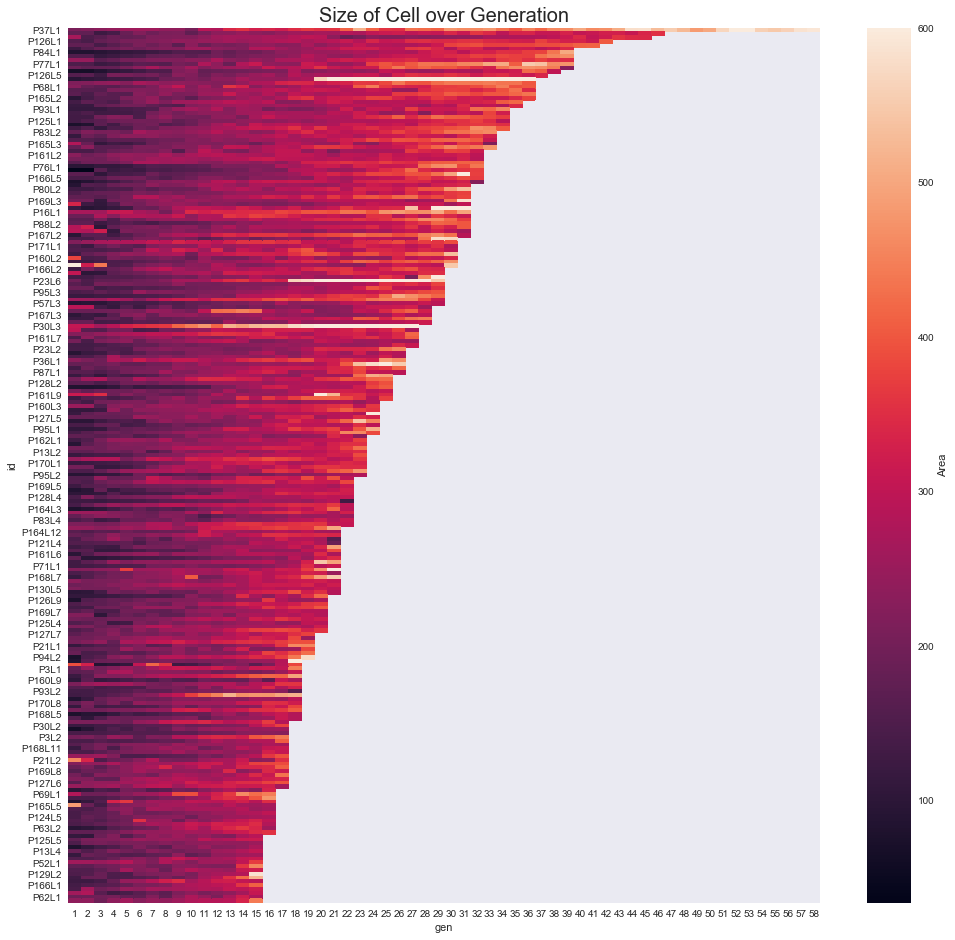

In [36]:
import seaborn as sns; sns.set()

heatmap_set = exp_gen_info.pivot_table(index = 'id', columns = 'gen', values = 'area')
heatmap_set[1].fillna(heatmap_set[2], inplace = True)
heatmap_set['full_count'] = heatmap_set.apply(lambda x: x.count(), axis = 1)
heatmap_set.sort_values('full_count', inplace = True, ascending = False)

#long_lived = heatmap_set.full_count >= 35
#short_lived = (heatmap_set.full_count <= 20) & (heatmap_set.full_count >= 15)

filter_gen = heatmap_set.full_count >= 15

heatmap_set = heatmap_set[filter_gen]
heatmap_set.drop('full_count', axis = 1, inplace = True)

fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(heatmap_set, vmax = 600, cbar_kws={'label': 'Area'}).set_title('Size of Cell over Generation', fontsize=20)

# Look at longest-lived cells

In [22]:
lifespans = exp_gen_info.groupby(by=['pos', 'label'])['min'].max().reset_index().sort_values(by=['min'], ascending=False)
lifespans.rename(columns={'min':'lifespan'}, inplace=True)
#lifespans

## Long-lived cells

In [23]:
long_lived = lifespans[lifespans['lifespan'] >= 4500]
#long_lived

(0, 528.1677060338483)

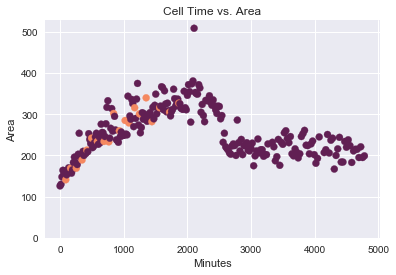

In [32]:
index = (exp_gen_info['pos']==170) & (exp_gen_info['label']==2)
plt.xlabel('Minutes')
plt.ylabel('Area')
plt.title('Cell Time vs. Area')
plt.scatter(exp_gen_info[index]['min'], exp_gen_info[index]['area'], marker='o', c=exp_gen_info[index]['state_int'], vmin=-.5, vmax=1.5)
plt.gca().set_ylim(ymin=0)


(0, 452.76770603384836)

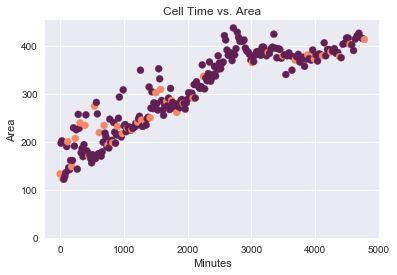

In [31]:
index = (exp_gen_info['pos']==94) & (exp_gen_info['label']==1)
plt.xlabel('Minutes')
plt.ylabel('Area')
plt.title('Cell Time vs. Area')
plt.scatter(exp_gen_info[index]['min'], exp_gen_info[index]['area'], marker='o', c=exp_gen_info[index]['state_int'], vmin=-.5, vmax=1.5)
plt.gca().set_ylim(ymin=0)


(0, 605.2677060338484)

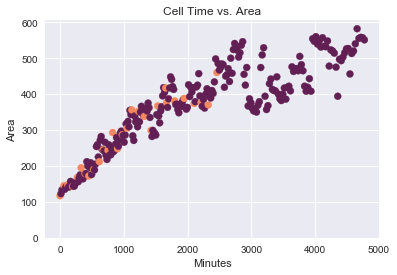

In [30]:
index = (exp_gen_info['pos']==89) & (exp_gen_info['label']==1)
plt.xlabel('Minutes')
plt.ylabel('Area')
plt.title('Cell Time vs. Area')
plt.scatter(exp_gen_info[index]['min'], exp_gen_info[index]['area'], c=exp_gen_info[index]['state_int'], vmin=-.5, vmax=1.5)
plt.gca().set_ylim(ymin=0)


(0, 571.4677060338485)

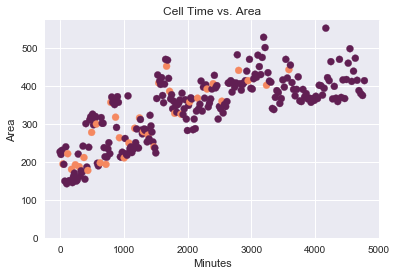

In [26]:
index = (exp_gen_info['pos']==68) & (exp_gen_info['label']==1)
plt.xlabel('Minutes')
plt.ylabel('Area')
plt.title('Cell Time vs. Area')
plt.scatter(exp_gen_info[index]['min'], exp_gen_info[index]['area'], c=exp_gen_info[index]['state_int'], vmin=-.5, vmax=1.5)
plt.gca().set_ylim(ymin=0)


(0, 512.7177060338483)

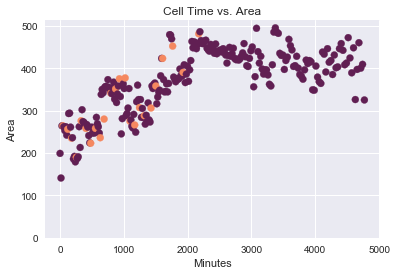

In [27]:
index = (exp_gen_info['pos']==34) & (exp_gen_info['label']==1)
plt.xlabel('Minutes')
plt.ylabel('Area')
plt.title('Cell Time vs. Area')
plt.scatter(exp_gen_info[index]['min'], exp_gen_info[index]['area'], c=exp_gen_info[index]['state_int'], vmin=-.5, vmax=1.5)
plt.gca().set_ylim(ymin=0)


(0, 477.41770603384833)

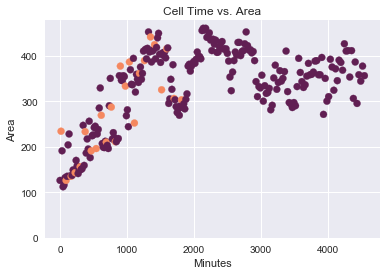

In [29]:
index = (exp_gen_info['pos']==22) & (exp_gen_info['label']==1)
plt.xlabel('Minutes')
plt.ylabel('Area')
plt.title('Cell Time vs. Area')
plt.scatter(exp_gen_info[index]['min'], exp_gen_info[index]['area'], c=exp_gen_info[index]['state_int'], vmin=-.5, vmax=1.5)
plt.gca().set_ylim(ymin=0)


(0, 583.4677060338485)

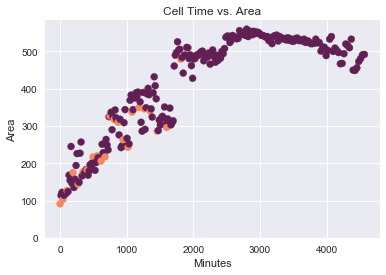

In [28]:
index = (exp_gen_info['pos']==95) & (exp_gen_info['label']==1)
plt.xlabel('Minutes')
plt.ylabel('Area')
plt.title('Cell Time vs. Area')
plt.scatter(exp_gen_info[index]['min'], exp_gen_info[index]['area'], c=exp_gen_info[index]['state_int'], vmin=-.5, vmax=1.5)
plt.gca().set_ylim(ymin=0)


## Shorter-lived cells

In [24]:
short_lived = lifespans[(lifespans['lifespan'] <= 3000) & (lifespans['lifespan'] >= 2000)]
#short_lived

(0, 646.4177060338483)

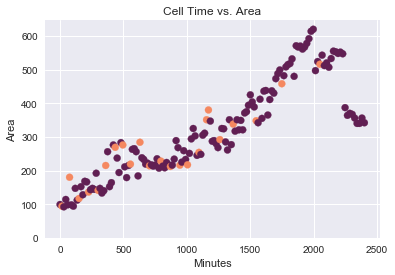

In [37]:
index = (exp_gen_info['pos']==86) & (exp_gen_info['label']==1)
plt.xlabel('Minutes')
plt.ylabel('Area')
plt.title('Cell Time vs. Area')
plt.scatter(exp_gen_info[index]['min'], exp_gen_info[index]['area'], c=exp_gen_info[index]['state_int'], vmin=-.5, vmax=1.5)
plt.gca().set_ylim(ymin=0)


(0, 503.0177060338483)

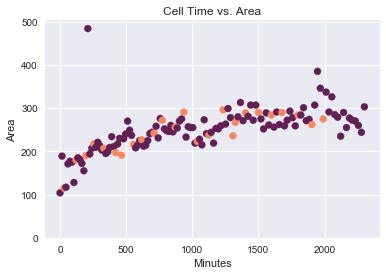

In [36]:
index = (exp_gen_info['pos']==124) & (exp_gen_info['label']==3)
plt.xlabel('Minutes')
plt.ylabel('Area')
plt.title('Cell Time vs. Area')
plt.scatter(exp_gen_info[index]['min'], exp_gen_info[index]['area'], c=exp_gen_info[index]['state_int'], vmin=-.5, vmax=1.5)
plt.gca().set_ylim(ymin=0)


(0, 427.3677060338484)

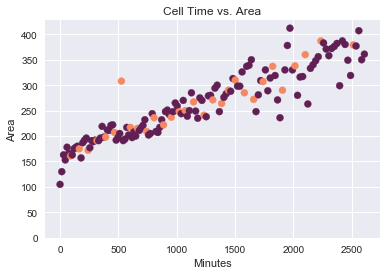

In [35]:
index = (exp_gen_info['pos']==169) & (exp_gen_info['label']==1)
plt.xlabel('Minutes')
plt.ylabel('Area')
plt.title('Cell Time vs. Area')
plt.scatter(exp_gen_info[index]['min'], exp_gen_info[index]['area'], c=exp_gen_info[index]['state_int'], vmin=-.5, vmax=1.5)
plt.gca().set_ylim(ymin=0)


(0, 438.4177060338484)

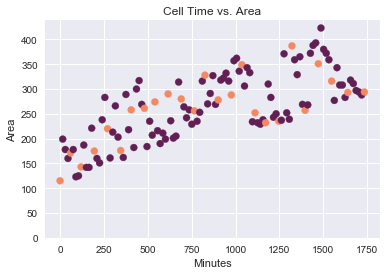

In [34]:
index = (exp_gen_info['pos']==87) & (exp_gen_info['label']==1)
plt.xlabel('Minutes')
plt.ylabel('Area')
plt.title('Cell Time vs. Area')
plt.scatter(exp_gen_info[index]['min'], exp_gen_info[index]['area'], c=exp_gen_info[index]['state_int'], vmin=-.5, vmax=1.5)
plt.gca().set_ylim(ymin=0)


(0, 456.71770603384834)

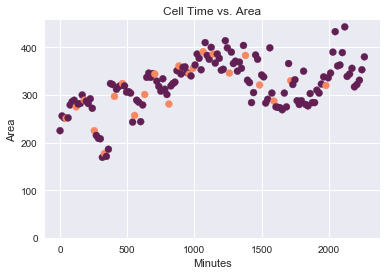

In [33]:
index = (exp_gen_info['pos']==2) & (exp_gen_info['label']==1)
plt.xlabel('Minutes')
plt.ylabel('Area')
plt.title('Cell Time vs. Area')
plt.scatter(exp_gen_info[index]['min'], exp_gen_info[index]['area'], c=exp_gen_info[index]['state_int'], vmin=-.5, vmax=1.5)
plt.gca().set_ylim(ymin=0)


# % of divisions in 1st half of life vs. Lifespan

In [30]:
lifespans.sort_values(by=['pos', 'label'], inplace=True)
final_area_change = exp_gen_info.groupby(by=['pos', 'label'])['area_change'].last().reset_index()

Text(0,0.5,'Final Area of Cell')

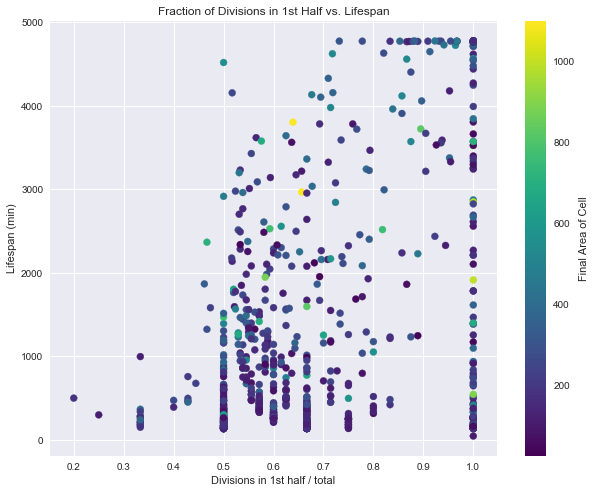

In [175]:

cmap = plt.cm.viridis
norm = matplotlib.colors.Normalize(vmin=final_area_change['area_change'].min(), vmax=1100)

fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
plt.scatter(first_half_gens['first half/total'], lifespans['lifespan'], c=cmap(norm(final_area_change['area_change'].values)))
plt.xlabel('Divisions in 1st half / total')
plt.ylabel('Lifespan (min)')
plt.title('Fraction of Divisions in 1st Half vs. Lifespan')

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm)
cbar.ax.set_ylabel('Final Area of Cell', rotation=90)


# Plotting Mean and Standard Deviation

In [20]:
mean_data = exp_gen_info.groupby(by='gen')['area_change'].mean().reset_index()

data_vals = exp_gen_info.pivot_table(index = 'id', columns = 'gen', values = 'area_change')
std_vals = data_vals.std(axis=0)
std_vals.reset_index(drop=True, inplace=True)

### Errorbar plot

(1, 46)

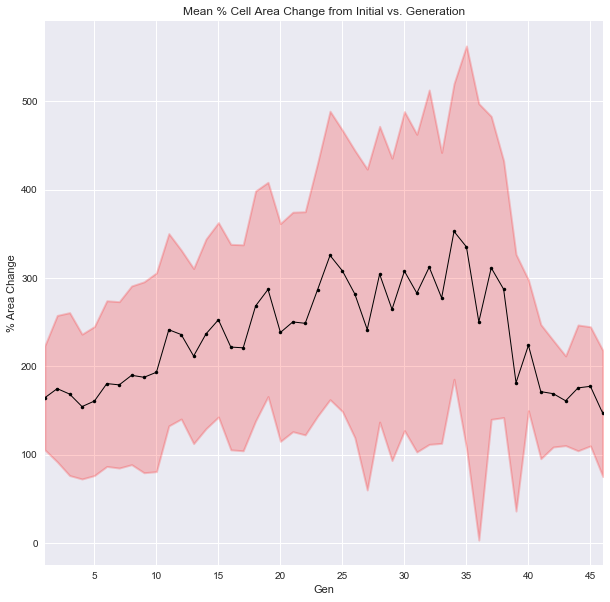

In [22]:

plt.figure(figsize=(10, 10))
plt.title('Mean % Cell Area Change from Initial vs. Generation')
plt.xlabel('Gen')
plt.ylabel('% Area Change')
plt.plot(mean_data['gen'], mean_data['area_change'], marker='.', linewidth=1, color='black')
plt.fill_between(mean_data['gen'], mean_data['area_change'] + std_vals, mean_data['area_change'] - std_vals, color='red', linewidth = 2, alpha=.2)

plt.xlim(xmin=1, xmax = 46)



### Box plot

(-0.5, 45.5)

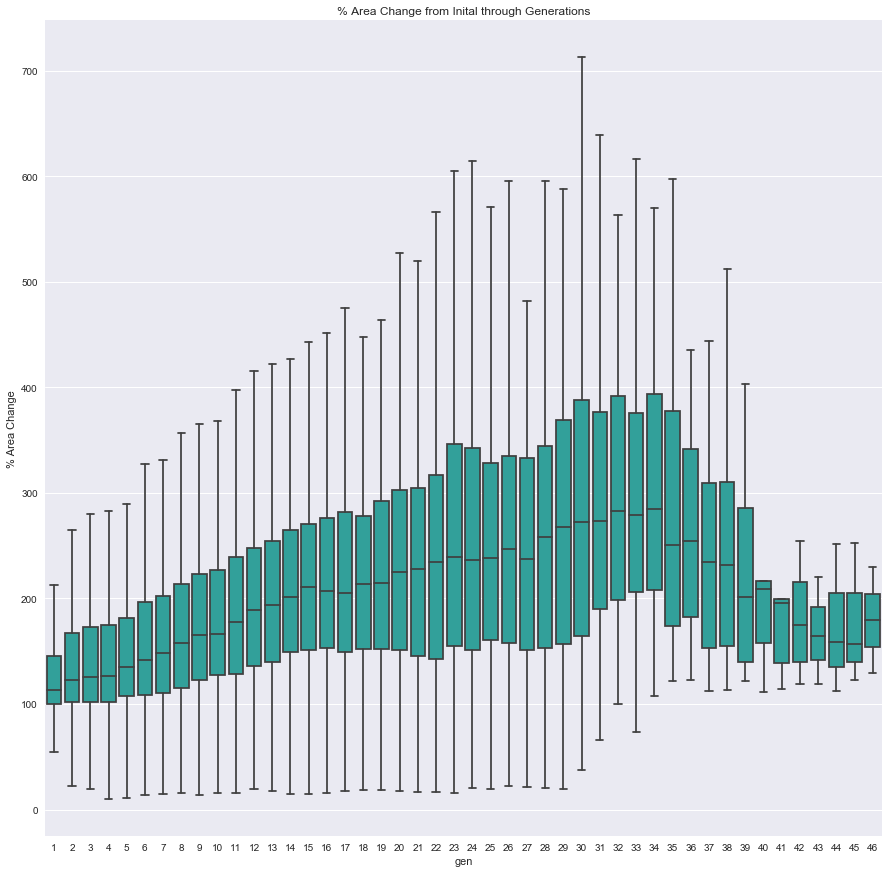

In [24]:
fig, ax = plt.subplots(figsize=(15,15)) 
ax = sns.boxplot(data=data_vals, color='lightseagreen', showfliers=False)
ax.set_title('% Area Change from Inital through Generations')
ax.set_ylabel('% Area Change')
ax.set_xlim(xmax=45.5)

Text(0,0.5,'Lifespan (min)')

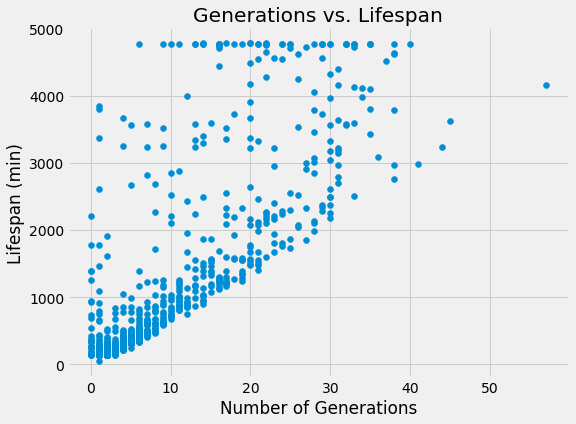

In [32]:
gens = exp_gen_info.groupby(by=['pos', 'label'])['state_int'].sum().reset_index().sort_values(by=['pos', 'label'])
gens.rename(columns={'state_int':'gens'}, inplace=True)

lifespans.sort_values(by=['pos', 'label'], inplace=True)
 
plt.figure(figsize=(8, 6))
plt.scatter(gens['gens'], lifespans['lifespan'])
plt.title('Generations vs. Lifespan')
plt.xlabel('Number of Generations')
plt.ylabel('Lifespan (min)')

In [2]:
total_gens = exp_gen_info.groupby(by=['pos', 'label'])['gen'].max().reset_index()

In [3]:
first_half_gens = exp_gen_info.groupby(by=['pos', 'label']).apply(lambda x: x[x['min'] <= x['min'].max()/2])
first_half_gens.drop(['pos', 'label'], axis=1, inplace=True)
first_half_gens.reset_index(inplace=True)
first_half_gens = first_half_gens.groupby(by=['pos', 'label'])['gen'].max().reset_index()
first_half_gens = first_half_gens.rename(columns={'gen':'first_half_gens'})
first_half_gens['first half/total'] = first_half_gens['first_half_gens'] / total_gens['gen']

KeyError: 'min'

# Initial cell size vs. Lifespan

Text(0.5,1,'Initial Cell Area vs Mean Lifespan')

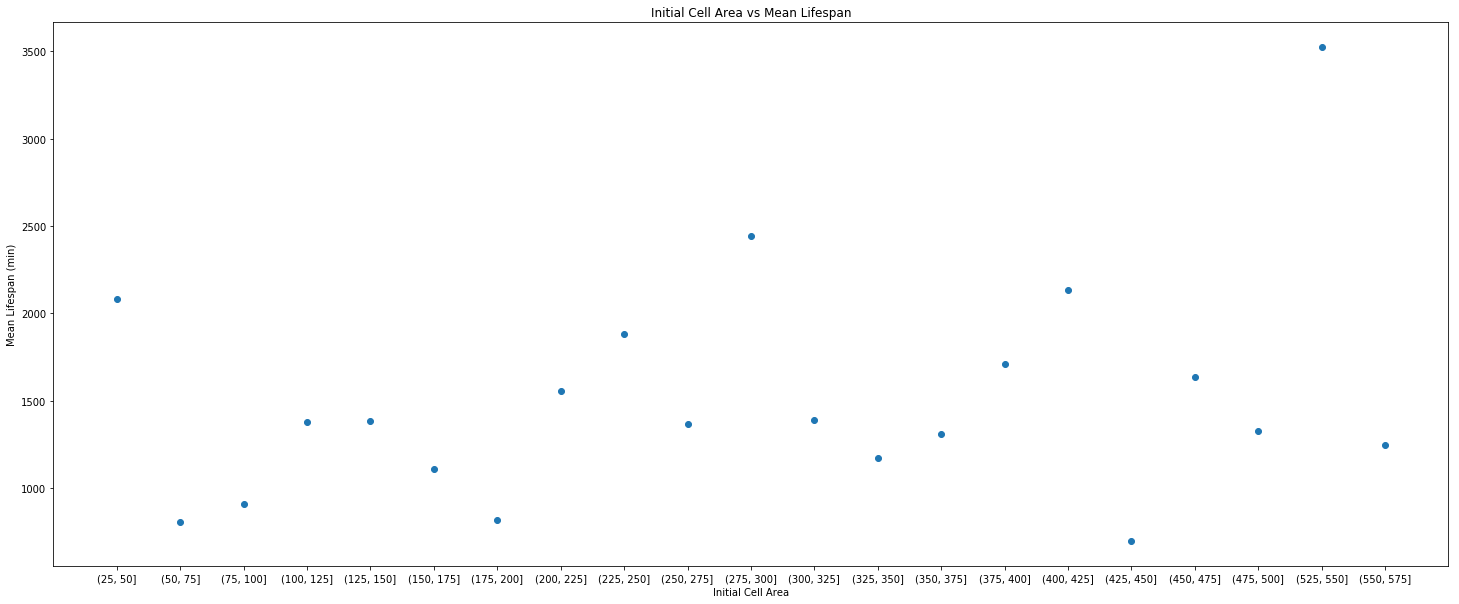

In [23]:
init_data = exp_gen_info.groupby(by=['pos', 'label']).first()
init_data.reset_index(inplace=True)

init_data = pd.merge(init_data, lifespans, on=['pos', 'label'], how='outer')
init_data.rename(columns={'area':'init_area'}, inplace=True)
init_data['final_area'] = exp_gen_info.groupby(by=['pos', 'label'])['area'].last().reset_index()['area']

mean_init_data = init_data.groupby(pd.cut(init_data['init_area'], np.arange(0, 600, 25)))['init_area', 'lifespan', 'final_area'].mean()
mean_init_data.dropna(axis=0, inplace=True)

plt.figure(figsize=(25, 10))
plt.scatter(np.linspace(0, 600, 21), mean_init_data.lifespan)
plt.xticks(np.linspace(0, 600, 21), mean_init_data.index)
#plt.ylim(ymin=0)
plt.xlabel('Initial Cell Area')
plt.ylabel('Mean Lifespan (min)')
plt.title('Initial Cell Area vs Mean Lifespan')


(-37.40591397849463, 600)

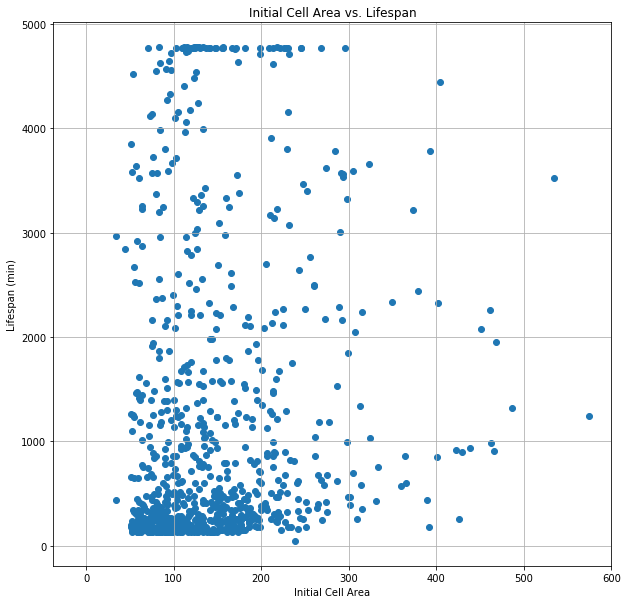

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches((10, 10))
plt.scatter(init_data['init_area'], init_data['lifespan'])
plt.xlabel('Initial Cell Area')
plt.ylabel('Lifespan (min)')
plt.title('Initial Cell Area vs. Lifespan')
plt.grid(True)
plt.xlim(xmax=600)


# Comparing median areas between long-lived and short-lived cells

Text(0.5,1,'Median Area over Time')

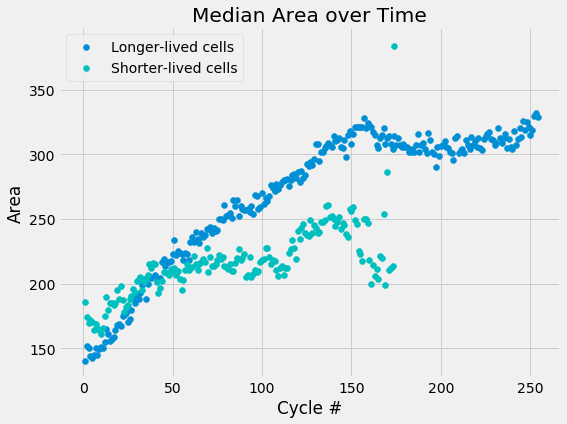

In [18]:
lifespans_long = exp_gen_info.groupby(by=['pos', 'label']).filter(lambda x: x['time'].max() >= 175)
med_lifespans_long = lifespans_long.groupby(by='time')['area'].median().reset_index()

lifespans_short = exp_gen_info.groupby(by=['pos', 'label']).filter(lambda x: x['time'].max() < 175)
med_lifespans_short = lifespans_short.groupby(by='time')['area'].median().reset_index()

plt.figure(figsize=(8, 6))
plt.scatter(med_lifespans_long['time'], med_lifespans_long['area'], marker='o', label='Longer-lived cells')
plt.scatter(med_lifespans_short['time'], med_lifespans_short['area'], marker='o', label='Shorter-lived cells', c='c')
plt.xlabel('Cycle #')
plt.ylabel('Area')
plt.legend(loc = 'upper left')
plt.title('Median Area over Time')